In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

df = pd.read_excel('F:\\New folder\\supply_chain_data.xlsx')
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Transportation Cost
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,188
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,142
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,255
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,779
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,189
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882


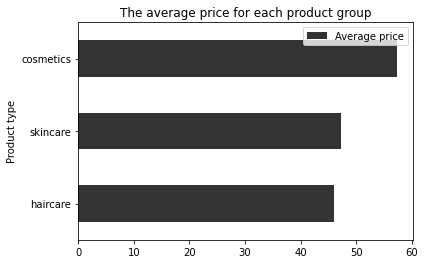

In [2]:
#The average price for each product group
data = df.groupby('Product type')['Price'].mean().reset_index(name='Average price')
product = data.set_index('Product type')
Product= product.sort_values(by=['Average price'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('The average price for each product group')
plt.show()

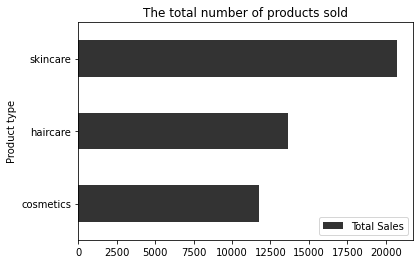

In [3]:
#The total number of products sold for each type 
data = df.groupby('Product type')['Number of products sold'].sum().reset_index(name='Total Sales')
product = data.set_index('Product type')
Product= product.sort_values(by=['Total Sales'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('The total number of products sold')
plt.show()

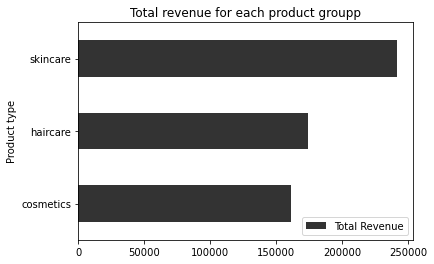

In [4]:
#Total revenue for each product group
data = df.groupby('Product type')['Revenue generated'].sum().reset_index(name='Total Revenue')
product = data.set_index('Product type')
Product= product.sort_values(by=['Total Revenue'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('Total revenue for each product groupp')
plt.show()

In [6]:
#The most popular products for each category of customers

import plotly.express as px

data = df.groupby(['Product type','Customer demographics'])['Revenue generated'].sum().reset_index(name='Total_numbers')

fig = px.bar(data, x="Customer demographics", y="Total_numbers", color="Product type", 
             title="The most popular products for each gender")
fig.show()


#fig.write_image("figure.png", engine="kaleido")
#fig.write_image("F:\\New folder\\images/fig1.png")

In [8]:
#Total Revenue from each product type for each Customer category
data = df.groupby(['Product type','Customer demographics'])['Number of products sold'].sum().reset_index(name='Total Revenue')

fig = px.bar(data, x="Customer demographics", y="Total Revenue", color="Product type", 
             title="Total Revenue from each product type for each gender")
fig.show()

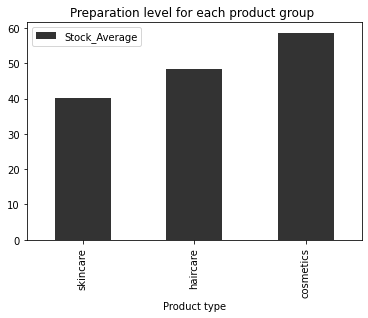

In [13]:
#The average stock levels for each product group
data = df.groupby('Product type')['Stock levels'].mean().reset_index(name='Stock_Average')
product = data.set_index('Product type')
Product= product.sort_values(by=['Stock_Average'])
Product.plot(kind = 'bar',color= 'k', alpha= 0.8)
plt.title('Preparation level for each product group ')
plt.show()

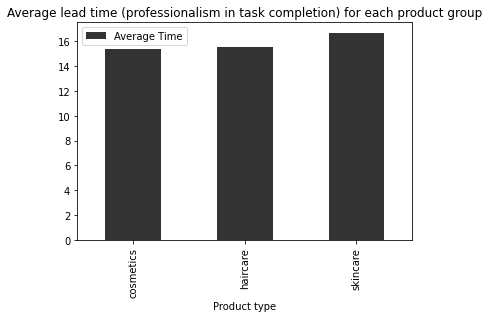

In [21]:
#Average lead time (professionalism in task completion) for each product group
data = df.groupby('Product type')['Lead times'].mean().reset_index(name='Average Time')
product = data.set_index('Product type')
Product= product.sort_values(by=['Average Time'])
Product.plot(kind = 'bar',color= 'k', alpha= 0.8)
plt.title('Average lead time (professionalism in task completion) for each product group')
plt.show()

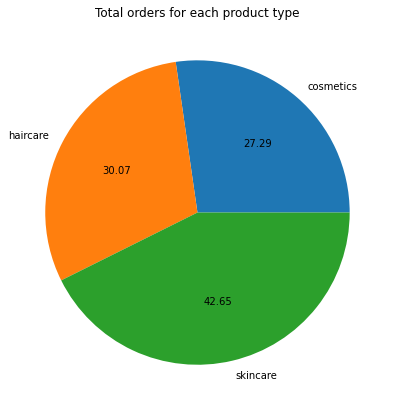

In [73]:
#Total orders for each product type
data= df.groupby(['Product type'])['Order quantities'].sum().reset_index(name='Orders')
product= data.set_index('Product type')
Product= list(data['Product type'])
Orders= list(data['Orders'])
fig = plt.figure(figsize =(10, 7))
plt.pie(Orders, labels = Product, autopct='%.2f')
plt.title('Total orders for each product type')
plt.show()

In [27]:
#Total orders from each product type for each gender
data = df.groupby(['Product type','Customer demographics'])['Order quantities'].mean().reset_index(name='Total Orders')

fig = px.bar(data, x="Customer demographics", y="Total Orders", color="Product type", 
             title="Total orders from each product type for each gender")
fig.show()

In [30]:
#Main locations statistics
grouped= df.groupby(['Location','Product type'])
data = grouped.agg({'Order quantities':sum,'Number of products sold': sum, 'Revenue generated':sum})
data 

Order quantities  Number of products sold  \
Location  Product type                                              
Bangalore cosmetics                  114                     1541   
          haircare                   297                     2160   
          skincare                   358                     1719   
Chennai   cosmetics                  319                     1743   
          haircare                   318                     2321   
          skincare                   472                     4704   
Delhi     cosmetics                  405                     4003   
          haircare                    71                     2606   
          skincare                   257                     3106   
Kolkata   cosmetics                  149                     1262   
          haircare                   435                     3407   
          skincare                   644                     8101   
Mumbai    cosmetics                  356                     3208   
          haircare                   359                     3117   
          skincare                   368                     3101   

                        Revenue generated  
Location  Product type                     
Bangalore cosmetics          19309.562880  
          haircare           51654.345696  
          skincare           31637.815307  
Chennai   cosmetics          31461.947457  
          haircare           28723.448932  
          skincare           58957.419359  
Delhi     cosmetics          37429.677331  
          haircare           14625.900767  
          skincare           28972.123128  
Kolkata   cosmetics          24163.571855  
          haircare           35027.713247  
          skincare           77886.265903  
Mumbai    cosmetics          49156.506477  
          haircare           44423.981964  
          skincare           44174.538437

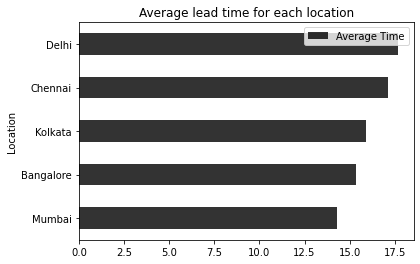

In [33]:
#Average lead time (professionalism in task completion) for each location
data = df.groupby('Location')['Lead times'].mean().reset_index(name='Average Time')
product = data.set_index('Location')
Product= product.sort_values(by=['Average Time'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('Average lead time for each location')
plt.show()

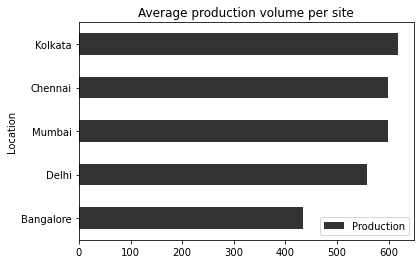

In [35]:
#Average Production volumes for each location
data = df.groupby('Location')['Production volumes'].mean().reset_index(name='Production')
product = data.set_index('Location')
Product= product.sort_values(by=['Production'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('Average production volume per site')
plt.show()

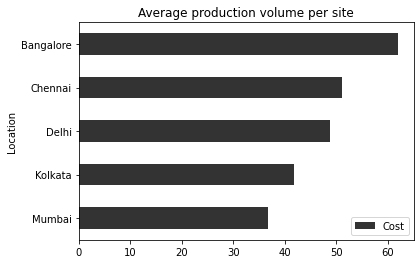

In [36]:
#The average size of manufacturing costs per location
data = df.groupby('Location')['Manufacturing costs'].mean().reset_index(name='Cost')
product = data.set_index('Location')
Product= product.sort_values(by=['Cost'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('The average cost of manufacturing per location.')
plt.show()

In [43]:
#Inspection results for each site
data = df.groupby(['Location', 'Inspection results'])['Inspection results'].count().reset_index(name='Numbers')

fig = px.bar(data, x="Inspection results", y="Numbers", color="Location", 
             title="Inspection results for each location")
fig.show()

In [44]:
#Inspection results for each product group
data = df.groupby(['Product type', 'Inspection results'])['Inspection results'].count().reset_index(name='Numbers')

fig = px.bar(data, x="Inspection results", y="Numbers", color="Product type", 
             title="Inspection results for each product group")
fig.show()

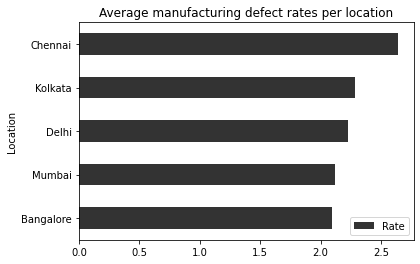

In [46]:
#Average manufacturing defect rates per location
data = df.groupby('Location')['Defect rates'].mean().reset_index(name='Rate')
product = data.set_index('Location')
Product= product.sort_values(by=['Rate'])
Product.plot(kind = 'barh',color= 'k', alpha= 0.8)
plt.title('Average manufacturing defect rates per location')
plt.show()

In [54]:
#The most effective technique for transforming products from each location
data = df.groupby(['Location', 'Transportation modes'])['Transportation modes'].count().reset_index(name='Numbers')

fig = px.bar(data, x="Location", y="Numbers", color="Transportation modes", 
             title="The most effective technique for transforming products from each location")
fig.show()

In [61]:
#The most effective technique for transforming products from each location
data = df.groupby(['Location', 'Transportation modes'])['Transportation Cost'].mean().reset_index(name='Cost')

fig = px.bar(data, x="Location", y="Cost", color="Transportation modes", 
             title="The most effective technique for transforming products from each location",text_auto=True)
fig.show()